<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Python-For-Finance-Stock-Analysis/blob/master/Python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd

In [0]:
import pandas_datareader.data as web

# import pandas.io.data as web

In [0]:
style.use('ggplot')

In [0]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [61]:
data = web.DataReader('TSLA','yahoo',start,end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


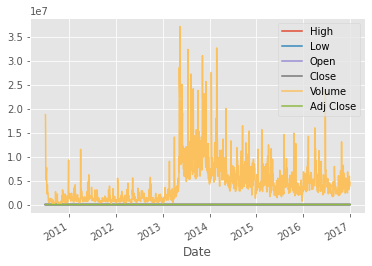

In [62]:
data.plot()
plt.show()

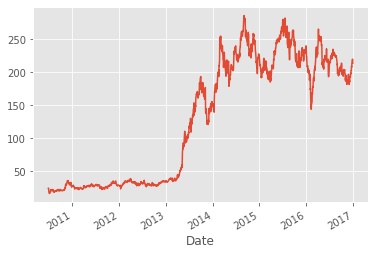

In [63]:
data['Adj Close'].plot()
plt.show()

In [64]:
print(data[['Close','Open']].head())

                Close       Open
Date                            
2010-06-29  23.889999  19.000000
2010-06-30  23.830000  25.790001
2010-07-01  21.959999  25.000000
2010-07-02  19.200001  23.000000
2010-07-06  16.110001  20.000000


In [65]:
# 100 Moving average ka col banaya adj closing k uper
#rolling?window?


data['100ma'] = data['Adj Close'].rolling(window=100, min_periods=0).mean()
data['100ma'].head()

Date
2010-06-29    23.889999
2010-06-30    23.860000
2010-07-01    23.226666
2010-07-02    22.220000
2010-07-06    20.998000
Name: 100ma, dtype: float64

In [66]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


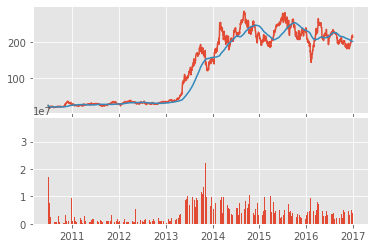

In [67]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan=5, colspan=1) #sharex=ax1

ax1.plot(data.index, data['Adj Close'])
ax1.plot(data.index, data['100ma'])
ax2.bar(data.index, data['Volume'])

plt.show()

In [68]:
# from plt.finance import candlestick_ohlc
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=ea2e773c11f902a02224444d4f11e1a237346f72cc7c1d670851bf03aa776bdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-caojui1x/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [0]:
from mpl_finance import candlestick_ohlc

In [0]:
# resample data by cal of ohlc
data_ohlc = data['Adj Close'].resample("10D").ohlc()

# resample data by cal of sum
data_vlume = data['Volume'].resample("10D").sum()

In [71]:
print(data_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [72]:
print(data_vlume.head())

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64


In [73]:
# index pe date arahi thi usko hata k real index diya he

data_ohlc.reset_index(inplace = True)
data_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [74]:
data_ohlc['Date'] = data_ohlc['Date'].map(mdates.date2num)
data_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [75]:
type(data_ohlc['Date'])

pandas.core.series.Series

In [0]:
# x-axis treates as date
ax1.xaxis_date()

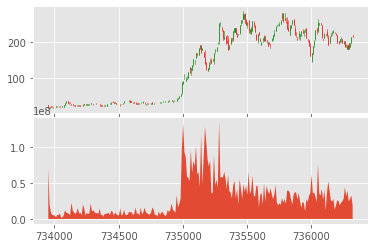

In [77]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan=5, colspan=1, sharex=ax1) #sharex=ax1

candlestick_ohlc(ax1, data_ohlc.values, colorup='g')

ax2.fill_between(data_vlume.index.map(mdates.date2num), data_vlume.values, 0)

plt.show()

**Ichimoku cloud**

* Tenkan-Sen – the conversion line
* Kijun-Sen – the baseline
* Chikou Span- lagging span
* Senkou Span A- leading span A
* Senkou Span B – leading span B

**Calculation**
* Kijun-sen = (26-day high + 26-day low) / 2
* Tenkan-sen = (9-day high + 9-day low) / 2
* Senkou Span B = (52-day high + 52-day low) / 2
* Senkou Span A = (Tenkan-sen + Kijun-sen) / 2
* Chikou Span = Close plotted 26 days in the past

In [78]:
# The baseline

data_H_L = data[['High','Low']]
data_H_L.head()

,High,Low
Date,,
2010-06-29,25.00,17.540001
2010-06-30,30.42,23.299999
2010-07-01,25.92,20.270000
2010-07-02,23.10,18.709999
2010-07-06,20.00,15.830000


In [79]:
data_H_L.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1640 entries, 2010-06-29 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1640 non-null   float64
 1   Low     1640 non-null   float64
dtypes: float64(2)
memory usage: 38.4 KB


In [0]:
baseline = (data['High'].rolling(window=26).max() + data['Low'].rolling(window=26).min())/2

In [81]:
baseline

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2016-12-23    196.724998
2016-12-27    201.125000
2016-12-28    201.900002
2016-12-29    201.900002
2016-12-30    201.900002
Length: 1640, dtype: float64

In [82]:
data["base_line"] = baseline
data.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma,base_line
Date,,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,202.6190,196.724998
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082,201.125000
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053,201.900002
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,202.2905,201.900002
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366,201.900002


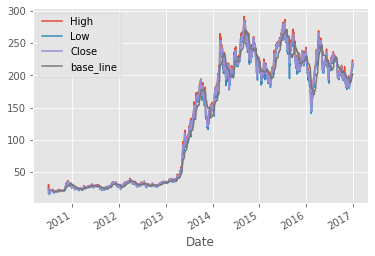

In [83]:
# Baseline Ploting

data[['High', 'Low', 'Close', 'base_line']].plot()

In [0]:
# baseline 26

In [0]:
# The Conversion/Turning line

Turning_line = (data['High'].rolling(window=9).max() + data['Low'].rolling(window=9).min())/2

In [86]:
Turning_line.head(20)

Date
2010-06-29       NaN
2010-06-30       NaN
2010-07-01       NaN
2010-07-02       NaN
2010-07-06       NaN
2010-07-07       NaN
2010-07-08       NaN
2010-07-09       NaN
2010-07-12    22.700
2010-07-13    22.700
2010-07-14    20.450
2010-07-15    19.040
2010-07-16    18.240
2010-07-19    18.615
2010-07-20    18.910
2010-07-21    19.400
2010-07-22    19.575
2010-07-23    19.575
2010-07-26    20.005
2010-07-27    20.625
dtype: float64

In [87]:
# Adding a Turning line coloumn in data

data['TurningLine'] = Turning_line
data.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma,base_line,TurningLine
Date,,,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,202.6190,196.724998,203.224998
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082,201.125000,209.504997
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053,201.900002,210.595001
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,202.2905,201.900002,210.700005
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366,201.900002,211.820000


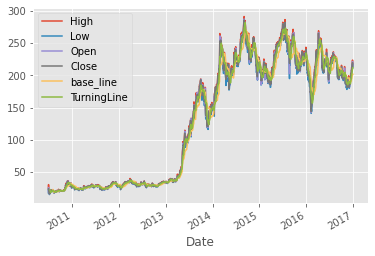

In [88]:
data[['High','Low','Open','Close','base_line','TurningLine']].plot()

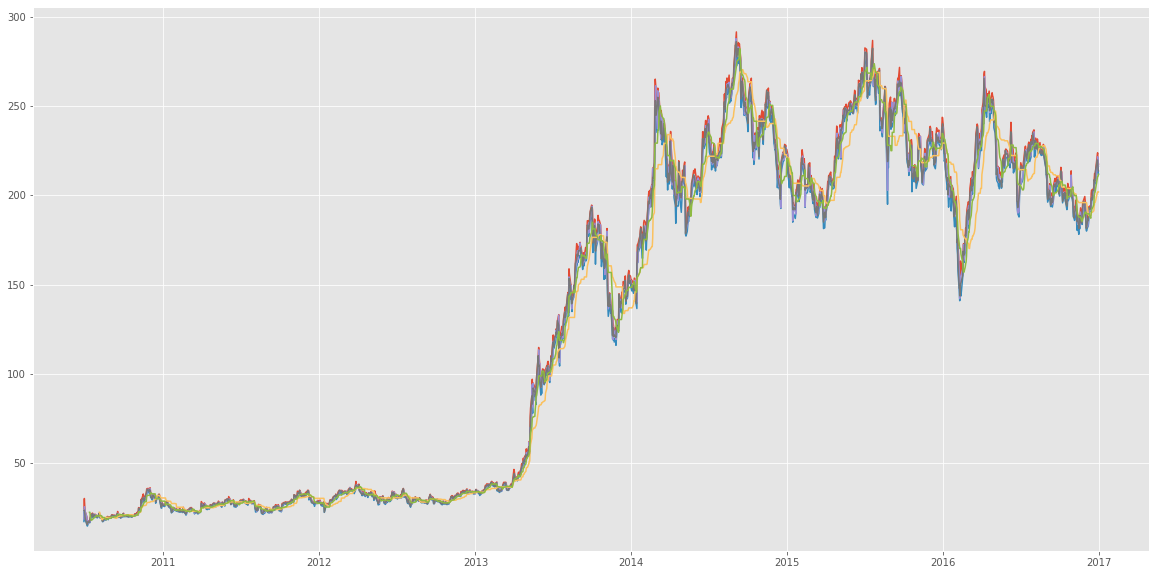

In [89]:
plt.figure(figsize=(20,10))
plt.plot(data[['High','Low','Open','Close','base_line','TurningLine']])
plt.show()

In [0]:
# import plot tools for zoom etc
# pip install plottools
# import plottools

import mpl_toolkits as plttools

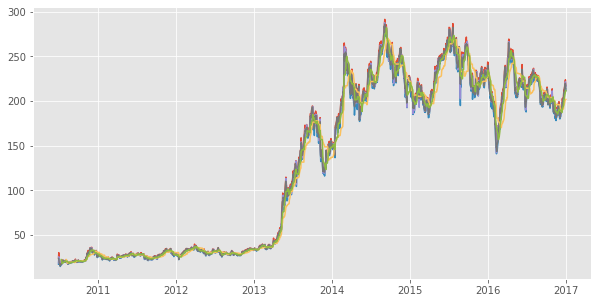

In [91]:
# Zooming Plots


plt.figure(figsize=(10,5))
plt.plot(data[['High','Low','Open','Close','base_line','TurningLine']])
# plt.margins()
# plt.xscale('symlog',linthreshx=2016)

plt.show()

**https://www.babypips.com/learn/forex/ichimoku-kinko-hyo**
**https://stackoverflow.com/questions/28477222/python-pandas-calculate-ichimoku-chart-components**
**https://blog.quantinsti.com/ichimoku-cloud-trading-strategy/**
**http://akuederle.com/matplotlib-zoomed-up-inset**
**https://matplotlib.org/1.3.1/mpl_toolkits/axes_grid/users/overview.html**

In [0]:
# Web scrapping

import bs4 as bs
import pickle
import requests

In [95]:
# make a function to save data into script not going again and again to web

def save_sp500_data():
  response = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
  soup = bs.BeautifulSoup(response.text, 'lxml')
  table = soup.find('table', {'class':'wikitable sortable'})
  trickers = []
  for row in table.findAll("tr")[1:]:
    tricker = row.findAll("td")[0].text
    trickers.append(tricker)

  with open("sp500trickers.pickle","wb") as f:
    pickle.dump(trickers, f)
  
  print(trickers)

  return trickers


save_sp500_data()

['MMM\n', 'ABT\n', 'ABBV\n', 'ABMD\n', 'ACN\n', 'ATVI\n', 'ADBE\n', 'AMD\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALXN\n', 'ALGN\n', 'ALLE\n', 'AGN\n', 'ADS\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'ANTM\n', 'AON\n', 'AOS\n', 'APA\n', 'AIV\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BLL\n', 'BAC\n', 'BK\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIIB\n', 'BLK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BF.B\n', 'CHRW\n', 'COG\n', 'CDNS\n', 'CPB\n', 'COF\n', 'CPRI\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CTL\n', 'CERN\n', 'CF\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'CI\n', 'CI

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'AGN\n',
 'ADS\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CPRI\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\